In [122]:
import glob
from util.parse import *

X_data = []
y_data = []

# After sorted, the list order is acce, then wave
fps_files   = sorted( glob.glob('data/fps*csv') )
mesg_files  = sorted( glob.glob('data/mesg*csv') )
email_files = sorted( glob.glob('data/email*csv') )


for i in range(0, len(fps_files), 2):
    print(fps_files[i])
    acce = parse_accel_csv(fps_files[i])
    wave = parse_wave_csv(fps_files[i+1], fft=True)
    X_data.append(np.append(acce,wave))
    
for i in range(0, len(mesg_files), 2):
    print(mesg_files[i])
    acce = parse_accel_csv(mesg_files[i])
    wave = parse_wave_csv(mesg_files[i+1], fft=True)
    X_data.append(np.append(acce,wave))
    
for i in range(0, len(email_files), 2):
    print(email_files[i])
    acce = parse_accel_csv(email_files[i])
    wave = parse_wave_csv(email_files[i+1], fft=True)
    X_data.append(np.append(acce,wave))


data/fps_01.acce.csv
data/fps_02.acce.csv
data/fps_03.acce.csv
data/fps_04.acce.csv
data/fps_05.acce.csv
data/fps_06.acce.csv
data/fps_07.acce.csv
data/fps_08.acce.csv
data/fps_09.acce.csv
data/fps_10.acce.csv
data/fps_11.acce.csv
data/fps_12.acce.csv
data/fps_13.acce.csv
data/fps_14.acce.csv
data/fps_15.acce.csv
data/fps_16.acce.csv
data/fps_17.acce.csv
data/fps_18.acce.csv
data/fps_19.acce.csv
data/fps_20.acce.csv
data/fps_21.acce.csv
data/fps_22.acce.csv
data/fps_23.acce.csv
data/fps_24.acce.csv
data/fps_25.acce.csv
data/fps_26.acce.csv
data/fps_27.acce.csv
data/fps_28.acce.csv
data/fps_29.acce.csv
data/fps_30.acce.csv
data/mesg_01.acce.csv
data/mesg_02.acce.csv
data/mesg_03.acce.csv
data/mesg_04.acce.csv
data/mesg_05.acce.csv
data/mesg_06.acce.csv
data/mesg_07.acce.csv
data/mesg_08.acce.csv
data/mesg_09.acce.csv
data/mesg_10.acce.csv
data/mesg_11.acce.csv
data/mesg_12.acce.csv
data/mesg_13.acce.csv
data/mesg_14.acce.csv
data/mesg_15.acce.csv
data/mesg_16.acce.csv
data/mesg_17.acce.

In [223]:
import keras
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model
from keras.metrics import top_k_categorical_accuracy
from keras.utils import to_categorical
from keras import backend as K

num_classes = 3
X_data = np.array(X_data)
y_data = [0]*30
y_data.extend( [1]*30 )
y_data.extend( [2]*30 )
y_data = to_categorical(y_data)
print(X_data.shape)
print(y_data.shape)


model = Sequential()
model.add(Dense(16, input_shape=(631,), activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
# model.add(Dense(4, activation='relu', kernel_initializer='he_normal'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adam(),
                  metrics=['accuracy'])

model.build()
model.summary()

(90, 631)
(90, 3)
Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_82 (Dense)             (None, 16)                10112     
_________________________________________________________________
batch_normalization_53 (Batc (None, 16)                64        
_________________________________________________________________
dropout_53 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_83 (Dense)             (None, 3)                 51        
Total params: 10,227
Trainable params: 10,195
Non-trainable params: 32
_________________________________________________________________


In [264]:
history = model.fit(x=X_data, y=y_data, 
          batch_size=10, epochs=100, verbose=0, callbacks=None, 
          validation_split=0.2, shuffle=True, class_weight=None, 
          sample_weight=None, initial_epoch=0, steps_per_epoch=None, 
          validation_steps=None, validation_freq=1, 
          max_queue_size=10, workers=1, use_multiprocessing=False)




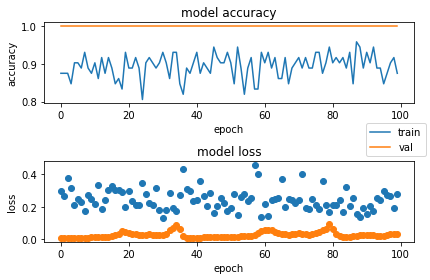

In [265]:
# summarize history for accuracy
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

# summarize history for loss
plt.subplot(2,1,2)
plt.plot(history.history['loss'],'o')
plt.plot(history.history['val_loss'],'o')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.figlegend(['train', 'val'], loc='right')
plt.tight_layout()
plt.show()